In [1]:
# importing the necessary Python packages
from transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils
import sys

In [9]:
# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread(r"E:\AI Learning\opencv course\Photos\basic-shapes.png")
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)


# convert the image to grayscale, blur it, and find edges in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blur, 75, 200)

# show the original image and the edge detected image

#cv2.imshow("Image", image)
#cv2.imshow("Edged", edged)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


**cv2.approxPolyDP**

What Is Contour Approximation?
Contour approximation, which uses the Ramer–Douglas–Peucker (RDP) algorithm, aims to simplify a polyline by reducing its vertices given a threshold value. In layman terms, we take a curve and reduce its number of vertices while retaining the bulk of its shape.

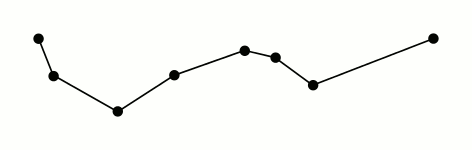

In [10]:
# find the contours in the edged image, keeping only the largest ones, and initialize the screen contour
cnts, hr = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c,  0.02 * peri,closed= True)
	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
	

# show the contour (outline) of the piece of paper
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2.imshow("Outline", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,145,255,cv2.THRESH_TOZERO)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
#warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
#T = threshold_local(warped, 11, offset = 10, method = "gaussian")
#warped = (warped > T).astype("uint8") * 255

# show the original and scanned images
cv2.imshow("Original", imutils.resize(orig, height = 650))
cv2.imshow("Scanned", imutils.resize(thresh, height = 650))
cv2.waitKey(0)
cv2.destroyAllWindows()

#### video

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()

    image = frame
    ratio = image.shape[0] / 500.0
    orig = image.copy()
    image = imutils.resize(image, height = 500)


    # convert the image to grayscale, blur it, and find edges in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blur, 75, 200)

    # find the contours in the edged image, keeping only the largest ones, and initialize the screen contour
    cnts, hr = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

    # loop over the contours
    for c in cnts:
      # approximate the contour
      peri = cv2.arcLength(c, True)
      approx = cv2.approxPolyDP(c,  0.02 * peri,closed= True)
      # if our approximated contour has four points, then we
      # can assume that we have found our screen
      if len(approx) == 4:
        screenCnt = approx
        break
      
    # apply the four point transform to obtain a top-down view of the original image
    warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
    gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,145,255,cv2.THRESH_TOZERO)
    
    # show the original and scanned images
    cv2.imshow("Original", imutils.resize(orig, height = 650))
    cv2.imshow("Scanned", imutils.resize(thresh, height = 650))

    if cv2.waitKey(27) & 0xFF == ord('q'):
      break

cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()